### Task 1, Team: Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.

In [9]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/covid_confirmed_usafacts.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 1269 entries, countyFIPS to 2023-07-23
dtypes: int64(1267), object(2)
memory usage: 30.9+ MB


Observing the confirmed cases dataset for US

In [4]:
df.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], inplace=True)
df.drop(df.loc[:,:'2020-05-24'], axis=1, inplace=True)
df.drop(df.loc[:,'2021-01-04':], axis=1, inplace=True)
series = df.sum()
series.to_csv('data/us_nationwide_confirmed.csv')

Here we trim off all the irrelevant columns and only keeping the date range of interest. Essentially converting the dataframe into a dataframe with only dates and cases. Then we can sum up each column (day) and store it as series. This will give us the number of each day for the entire country. 

In [5]:
sr_mean = np.round(series.rolling(window=7).mean())
sr_mean.drop(sr_mean.index[0:7], inplace=True)
sr_mean.to_csv('data/us_confirmed_mean.csv')

A rolling window of 7 is chosen to calculate the rolling weekly mean value of the confirmed cases. Since the rolling results are aligned to the right, the first 7 days are dropped. The result is then saved to csv. 

In [6]:
sr_median = series.rolling(window=7).median()
sr_median.drop(sr_median.index[0:7], inplace=True)
sr_median.to_csv('data/us_confirmed_median.csv')

Medians with rolling window size of 7 were calculated with similar approach as means. First 7 days dropped. Result saved to csv. 

In [7]:
def get_mode(window):
    val_count = window.value_counts()
    mode = val_count.index[val_count == val_count.max()]
    return np.round(stat.fmean(mode.tolist())) if len(mode) > 0 else mode[0]
sr_mode = series.rolling(window=7).apply(get_mode)
sr_mode.drop(sr_mode.index[0:7], inplace=True)
sr_mode.to_csv('data/us_confirmed_mode.csv')

Since Pandas.Series does not have a mode method, we implemented a function to calculate it. In the event there's multiple modes, an average is calculated and rounded, then returned. 

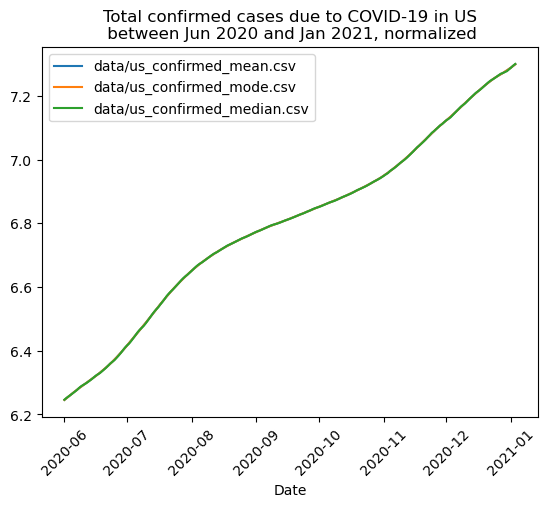

In [47]:
def add_to_plot(filename):
    df = pd.read_csv(filename)
    x = df.iloc[:, 0].values
    x = np.asarray(x, dtype='datetime64[s]')
    y = np.log10(df.iloc[:, 1].values)
    plt.plot(x, y, label = filename)
add_to_plot('data/us_confirmed_mean.csv')
add_to_plot('data/us_confirmed_mode.csv')
add_to_plot('data/us_confirmed_median.csv')
plt.title("Total confirmed cases of COVID-19 in US\n between Jun 2020 and Jan 2021, normalized")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("")
plt.legend()
plt.show()

Plot the normalized data

In [48]:
df = pd.read_csv('data/covid_deaths_usafacts.csv')

df.drop(columns=['countyFIPS', 'County Name', 'State', 'StateFIPS'], inplace=True)
df.drop(df.loc[:,:'2020-05-24'], axis=1, inplace=True)
df.drop(df.loc[:,'2021-01-04':], axis=1, inplace=True)
series = df.sum()
series.to_csv('data/us_nationwide_deaths.csv')

sr_mean = np.round(series.rolling(window=7).mean())
sr_mean.drop(sr_mean.index[0:7], inplace=True)
sr_mean.to_csv('data/us_deaths_mean.csv')

sr_median = series.rolling(window=7).median()
sr_median.drop(sr_median.index[0:7], inplace=True)
sr_median.to_csv('data/us_deaths_median.csv')

sr_mode = series.rolling(window=7).apply(get_mode)
sr_mode.drop(sr_mode.index[0:7], inplace=True)
sr_mode.to_csv('data/us_deaths_mode.csv')

To process the data for COVID death cases, a similar approach is taken as for Confirmed cases. 

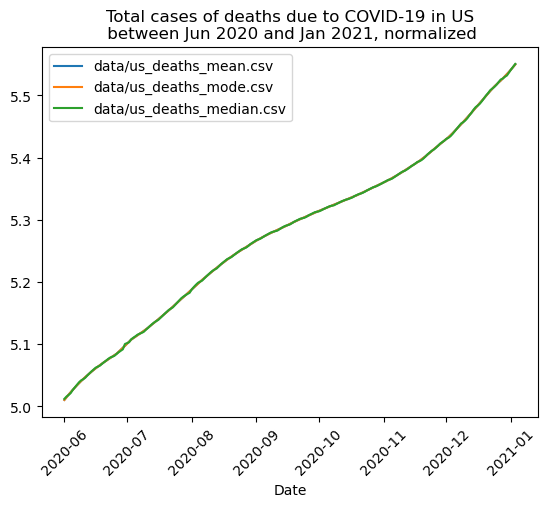

In [49]:
def add_to_plot(filename):
    df = pd.read_csv(filename)
    x = df.iloc[:, 0].values
    x = np.asarray(x, dtype='datetime64[s]')
    y = np.log10(df.iloc[:, 1].values)
    plt.plot(x, y, label = filename)
add_to_plot('data/us_deaths_mean.csv')
add_to_plot('data/us_deaths_mode.csv')
add_to_plot('data/us_deaths_median.csv')
plt.title("Total cases of deaths due to COVID-19 in US\n between Jun 2020 and Jan 2021, normalized")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("")
plt.legend()
plt.show()